# **<p style = "text-align: center">LẬP TRÌNH KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
## **<p style = "text-align: center">ĐẶT VÀ TRẢ LỜI CÂU HỎI</p>**

### <p style = "text-align: center"> <b>Đề tài:</b> Thống kê phân tích giá nhà ở Hà Nội</p>
<p style = "text-align: center"> Sinh viên thực hiện </p>

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120127 | Trần Minh Tuấn Kiệt |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **Import the package**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

# **Information of dataset**
- Dataset được lấy từ <a href = "https://www.kaggle.com"> Kaggle </a>. <br>
- Dataset là thông tin giá cả của những căn nhà ở Hà Nội thông qua các đặc điểm của một căn nhà.<br>
- Trang của Dataset <a herf = "https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi"> https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi</a>. <br>
- Tác giả của Dataset: LE ANH DUC. <br>
- License: CC BY-NC-SA 4.0

### Đọc dữ liệu từ file EDA_preprocessing.csv

In [4]:
house_df = pd.read_csv('./csv/EDA_Preprocessing.csv')

In [5]:
display(house_df)

,Date,Address,District,Ward,Type,Legal,Number of floors,Number of bedrooms,Area,Length,Width,Price/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,NaN,NaN,86960000.0
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,NaN,NaN,116220000.0
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,10.00,4.0,65000000.0
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,12.75,4.0,100000000.0
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,9.00,4.0,86110000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81676,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3.0,38.0,NaN,NaN,81580000.0
81677,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,50.0,NaN,NaN,292000000.0
81678,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,NaN,NaN,341460000.0
81679,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4.0,60.0,NaN,NaN,101670000.0


In [6]:
pattern = '%Y-%m-%d'
house_df['Date'] = pd.to_datetime(house_df['Date'], format=pattern)

---

# **Đưa ra các câu hỏi cần trả lời:**

### **Câu 1**: Có thể cùng 1 đơn vị diện tích mà giá cả nhà ở Hà Nội lại khác nhau do chiều dài hay chiều rộng?

- **Khi trả lời câu hỏi thành công:** Ta sẽ biết được chiều dài hay chiều rộng, cái nào mới là nhân tố quyết định giá cả của 1 căn nhà.
- **Khó khăn:** Dữ liệu còn rất nhiều outliers, cần phải xử lý nhiều !!!

**Bước 1:** Lấy ra các cột cần sử dụng cho câu hỏi

In [7]:
cols = ['Area', 'Length', 'Width', 'Price/m2']
ques01_df = house_df[cols]
ques01_df

,Area,Length,Width,Price/m2
0,46.0,NaN,NaN,86960000.0
1,37.0,NaN,NaN,116220000.0
2,40.0,10.00,4.0,65000000.0
3,51.0,12.75,4.0,100000000.0
4,36.0,9.00,4.0,86110000.0
...,...,...,...,...
81676,38.0,NaN,NaN,81580000.0
81677,50.0,NaN,NaN,292000000.0
81678,41.0,NaN,NaN,341460000.0
81679,60.0,NaN,NaN,101670000.0


**Bước 2:** Xử lý các dữ liệu liệu NaN

In [9]:
ques01_df = ques01_df.loc[ques01_df['Length'].isnull() != True]
ques01_df = ques01_df.loc[ques01_df['Width'].isnull() != True]
ques01_df

,Area,Length,Width,Price/m2
2,40.0,10.00,4.0,65000000.0
3,51.0,12.75,4.0,100000000.0
4,36.0,9.00,4.0,86110000.0
5,46.0,12.10,3.8,104350000.0
8,75.0,12.00,6.5,120000000.0
...,...,...,...,...
81540,37.0,13.00,3.0,43240000.0
81541,100.0,16.00,6.0,115000000.0
81544,80.0,14.00,5.0,262500000.0
81546,89.0,20.00,4.0,258430000.0


Dữ liệu có đa số chiều dài chiều rộng của căn nhà, ta sẽ scale lại các độ dài đó tương ứng như sau: <br>
- (1000,): lớn hơn hoặc bằng 1000m
- (900, 1000): [900,1000)
- (800, 900): [800,900)
- ...
- (0,100): (0,100)
- (0,0): bằng 0

**Bước 3:** Scale lại dữ liệu và thêm các cột mới

In [10]:
def scaling_range(x):  
    if x > 1000.0:
        return (1000,)
    elif x == (0.0):
        return (0,0)
    else:
        return (x // 100 * 100, x // 100 * 100 + 100)

In [11]:
ques01_df_width = pd.DataFrame({'scaling_width': ques01_df['Width'].apply(scaling_range)})
ques01_df = pd.concat([ques01_df, ques01_df_width], axis= 1)
ques01_df_Length = pd.DataFrame({'scaling_length': ques01_df['Length'].apply(scaling_range)})
ques01_df = pd.concat([ques01_df, ques01_df_Length], axis= 1)
ques01_df

,Area,Length,Width,Price/m2,scaling_width,scaling_length
2,40.0,10.00,4.0,65000000.0,"(0.0, 100.0)","(0.0, 100.0)"
3,51.0,12.75,4.0,100000000.0,"(0.0, 100.0)","(0.0, 100.0)"
4,36.0,9.00,4.0,86110000.0,"(0.0, 100.0)","(0.0, 100.0)"
5,46.0,12.10,3.8,104350000.0,"(0.0, 100.0)","(0.0, 100.0)"
8,75.0,12.00,6.5,120000000.0,"(0.0, 100.0)","(0.0, 100.0)"
...,...,...,...,...,...,...
81540,37.0,13.00,3.0,43240000.0,"(0.0, 100.0)","(0.0, 100.0)"
81541,100.0,16.00,6.0,115000000.0,"(0.0, 100.0)","(0.0, 100.0)"
81544,80.0,14.00,5.0,262500000.0,"(0.0, 100.0)","(0.0, 100.0)"
81546,89.0,20.00,4.0,258430000.0,"(0.0, 100.0)","(0.0, 100.0)"


**Bước 4:** Trực quan hoá dữ liệu

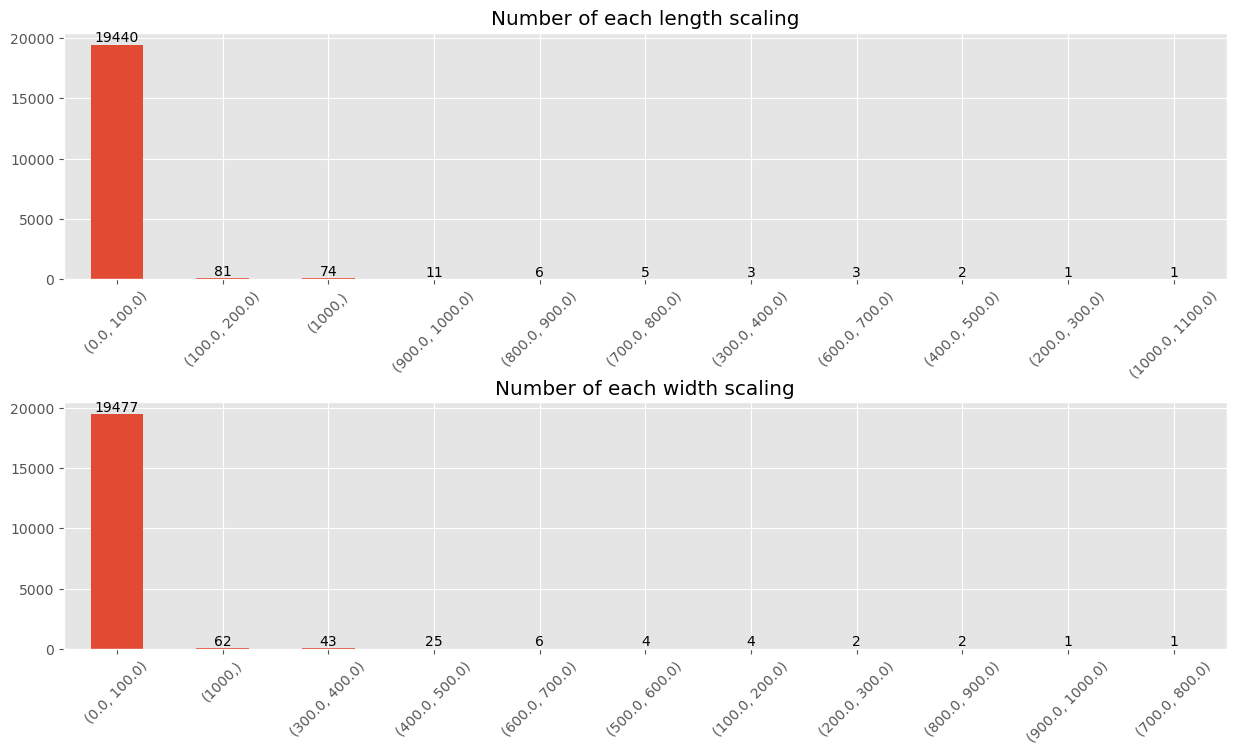

In [12]:
length_df = ques01_df['scaling_length'].value_counts()
width_df  = ques01_df['scaling_width'].value_counts()

plt.style.use('ggplot')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 8))
length_df.plot.bar(ax = axes[0], rot = 45)
axes[0].set_title('Number of each length scaling')
plt.subplots_adjust(hspace = 0.5)
width_df.plot.bar(ax = axes[1], rot = 45)
axes[1].set_title('Number of each width scaling')

for i in axes[0].containers:
    axes[0].bar_label(i,)
    
for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()

Ta thấy có vẻ như chiều dài và chiều rộng chiếm đa số vào từ (0,100). Ta sẽ chú ý phân tích vào các độ dài này để có dự đoán chính xác hơn !

**Bước 5:** Ta sẽ lọc dữ liệu lại và tiếp tục scale độ dài lại như sau:
- (90, 100): [90,100)
- (80, 90): [80,90)
- ...
- (0,10): (0,10)
- (0,0): bằng 0

In [80]:
def scaling_range_10(x):  
    if x == (0.0):
        return (0.0, 0.0)
    else:
        return (x // 10 * 10, x // 10 * 10 + 10)

In [90]:
ques01_df = house_df[cols]
ques01_df = ques01_df.loc[(ques01_df['Length'].isnull() != True) & (ques01_df['Length'] < 100.0)] 
ques01_df = ques01_df.loc[(ques01_df['Width'].isnull() != True) & (ques01_df['Width'] < 100.0)]
ques01_df_width_10 = pd.DataFrame({'scaling_width': ques01_df['Width'].apply(scaling_range_10)}).sort_index()
ques01_df = pd.concat([ques01_df, ques01_df_width_10], axis= 1)
ques01_df_length_10 = pd.DataFrame({'scaling_length': ques01_df['Length'].apply(scaling_range_10)}).sort_index()
ques01_df = pd.concat([ques01_df, ques01_df_length_10], axis= 1)
ques01_df.scaling_width = ques01_df.scaling_width.astype(str)
ques01_df.scaling_length = ques01_df.scaling_length.astype(str)

**Bước 6:** Trưc quan hoá dữ liệu

In [85]:
heatmap = ques01_df.sort_values(by=['scaling_width', 'scaling_length'])
heatmap = ques01_df.groupby(['scaling_width', 'scaling_length'])['Price/m2'].mean()
# temp111 = temp111.to_frame().rename(columns= {'Price/m2': 'Mean'}).reset_index()
heatmap = heatmap.unstack(level= 1)
heatmap

scaling_length,"(0.0, 10.0)","(10.0, 20.0)","(20.0, 30.0)","(30.0, 40.0)","(40.0, 50.0)","(50.0, 60.0)","(60.0, 70.0)","(70.0, 80.0)","(80.0, 90.0)","(90.0, 100.0)"
scaling_width,,,,,,,,,,
"(0.0, 10.0)",1.011491e+08,7.122657e+10,1.263339e+08,1.353537e+08,8.281207e+07,9.324083e+07,6.836568e+07,8.394150e+07,7.556900e+07,104745000.0
"(10.0, 20.0)",1.377101e+08,1.587989e+08,1.324650e+08,2.019595e+08,1.009140e+08,9.867500e+07,NaN,NaN,NaN,NaN
"(20.0, 30.0)",1.633356e+08,1.142677e+08,1.090709e+08,1.282840e+08,2.264734e+07,4.670000e+06,NaN,NaN,NaN,NaN
"(30.0, 40.0)",9.190671e+07,7.795547e+07,5.217000e+07,9.395526e+07,1.000000e+08,1.008450e+08,5.421000e+07,7.921400e+07,7.214833e+07,71582500.0
"(40.0, 50.0)",1.036376e+08,1.030077e+08,5.051472e+07,4.158900e+08,7.418667e+07,2.313500e+07,8.125000e+07,8.461750e+07,1.575000e+06,82934000.0
"(50.0, 60.0)",9.438250e+07,1.014206e+08,7.712500e+07,NaN,1.081800e+08,8.213167e+07,8.035333e+07,6.798333e+07,NaN,87045000.0
"(60.0, 70.0)",5.475500e+07,1.160800e+08,6.360000e+06,NaN,NaN,7.833000e+07,9.146167e+07,NaN,NaN,55560000.0
"(70.0, 80.0)",8.970667e+07,5.278000e+07,NaN,NaN,NaN,NaN,3.261000e+07,4.808000e+07,9.636000e+07,NaN
"(80.0, 90.0)",1.900000e+08,4.427500e+08,NaN,7.344000e+07,NaN,NaN,NaN,NaN,1.937500e+08,NaN


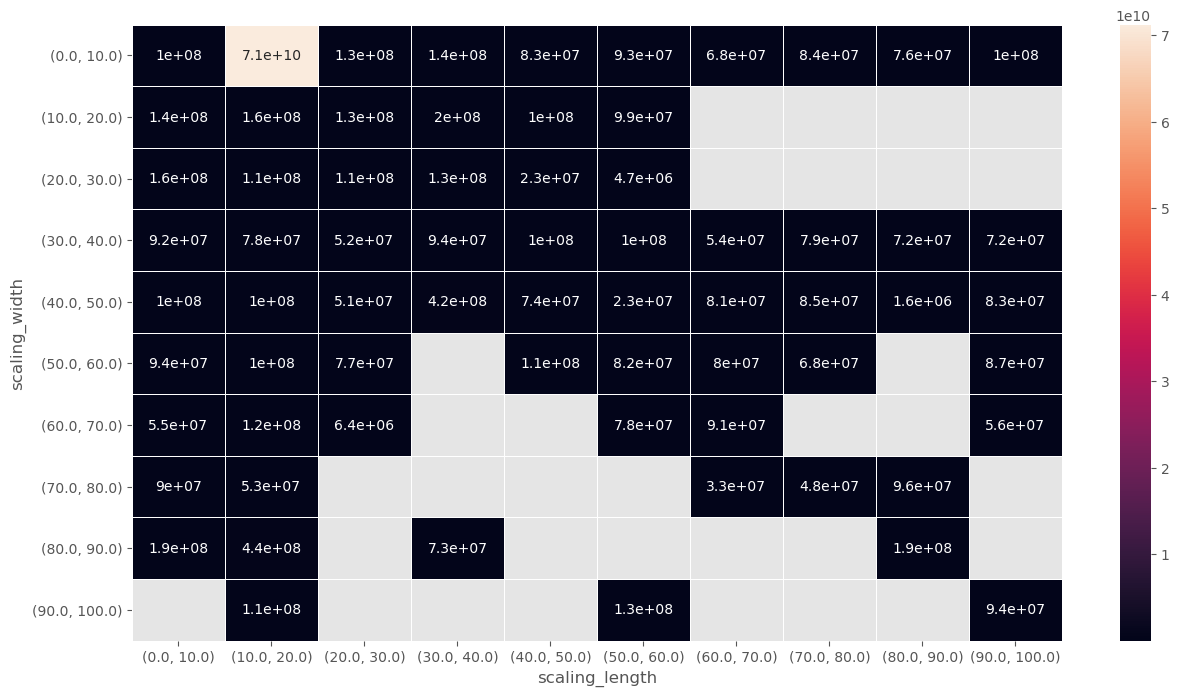

In [84]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))    
ax = sns.heatmap(heatmap, linewidths= 0.5, annot= True)

**Nhận xét:** <br>
- Có vẻ như với chiều rộng tầm (0,10); (30,40); (40,50) thì ta sẽ có đa dạng nhiều nhất về với chiều dài của nhà. Nhìn chung có vẻ như giá của các nhà có chiều rộng ngắn với chiều dài ngắn giá có vẻ mắc và giảm dần sau đó.
- với các chiều dài độ dài càng lớn thì có vẻ như độ đa dạng ít dần đi và giá cả cũng mắc dần.
Qua đây, chúng ta có thể nhận xét có thể do nhu cầu mua đất nhỏ để ở có vẻ nhiều, dẫn đến có những outlier giá rất là 'ảo' do người rao hay định giá

---